<a href="https://colab.research.google.com/github/phamhoangtin/C4E_Python_Books/blob/master/Tips_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sn

In [ ]:
# load sample dataset of seaborn
df_tips = sn.load_dataset("tips")

In [ ]:
# get 10 records first
df_tips.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Đây là dữ liệu thu thập của 1 nhà hàng 

1.   total_bill : tổng hóa đơn
2.   tip : là tiền thừa
3.   sex là giới tính người trả tiền
4.   smorker có hút thuốc không
5.   day : ngày trong tuần
6.   time:  thời gian ăn trong ngày
7.   size: số lượng khách trong 1 bàn



### kiểm tra dữ liệu có dữ liệu rỗng không

In [ ]:
#check empty 
df_tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### số tiền tip lớp nhất là bao nhiêu

In [ ]:
# check max of 1 column
df_tips["tip"].max()

10.0

### kiểm tra kiểu dữ liệu và kích thước của toàn bộ dataset

In [ ]:
# check infor of all dataframe
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### thống kê toàn bộ dataset

In [ ]:
# statistic all data frame
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### đi tìm những giá trị của cột size được cho là "quá khổ" bằng biểu đồ box plot.  

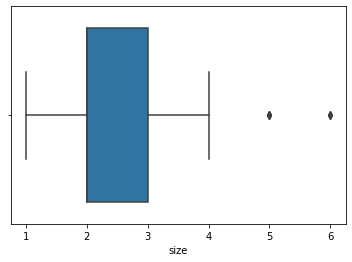

In [ ]:
# visualize boxplot for dectect ourlier
sn.boxplot(x = df_tips["size"])

### đếm số lượng nam và nữ

In [ ]:
# count value this fuction use only for category  data set
df_tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

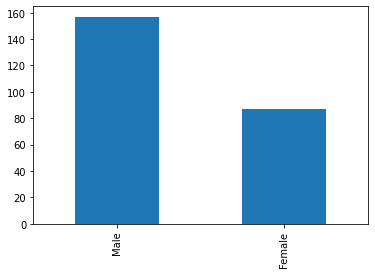

In [ ]:
# visualize data bar chart
df_tips["sex"].value_counts().plot(kind = 'bar')

In [ ]:
# finding unique value of column category datatype
df_tips["smoker"].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

### kiểm tra giữa nam và nữ ai hút thuốc nhiều hơn

In [ ]:
# groupby sex and count smoker
df_tips.groupby(["sex","smoker"]).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

### nhà hàng này mở các ngày nào trong tuần

In [ ]:
df_tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# thống kê số lượng khách theo từng ngày, và theo từng thời gian cụ thể trong ngày để xắp sếp nhân viên phù hợp?

In [ ]:
df_tips.groupby(["day","time"]).size()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
dtype: int64

### thống kê xem ngày nào có được tiền tip cao nhất

In [ ]:
df_tips.groupby(["day"]).tip.sum()

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

### khách thường đi bao nhiêu người dến nhà hàng ăn?

In [ ]:
df_tips["size"].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

### vẽ biểu đồ toàn bộ data set có kiểu dữ liệu category

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8da365c6d8>,
      dtype=object)

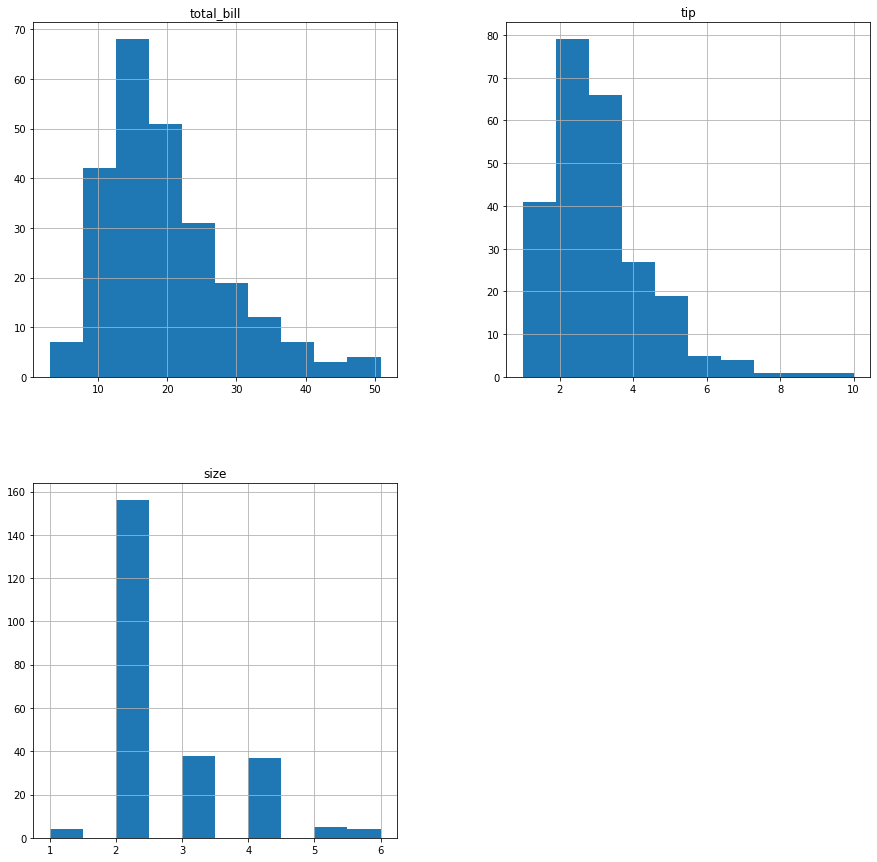

In [ ]:
df_tips.hist(figsize = (15,15))

### tìm mối quan hệ giữa các cột thông qua hệ số correlation

In [ ]:
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000
